In [33]:
# Import required libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split

# Part A: Build a Face Detection System

In [34]:
# Import and read "images.npy"
images = np.load("C:\\Users\\hp\\Documents\\Great Learning_Computer Vision\\images.npy",allow_pickle=True)

In [35]:
# Keep a deep copy of the original data for future reference

import copy

images_original = copy.deepcopy(images)


In [36]:
# Datatype of "images"
type(images)

numpy.ndarray

In [37]:
images.shape
# "images" is an array. The length of the array is 393 (i.e., no. of images are 393)
# Each element of this array consist of two parts.
# The first part is the image array and the second part is the metadata.

(393, 2)

In [38]:
# Fisrt element of the "imagaes" array (Consist of image array and metadata)
images[0]

array([array([[[42, 37, 34],
               [56, 51, 48],
               [71, 66, 63],
               ...,
               [23, 33, 34],
               [26, 36, 37],
               [28, 38, 39]],

              [[40, 35, 32],
               [51, 46, 43],
               [64, 59, 56],
               ...,
               [27, 36, 35],
               [24, 33, 32],
               [26, 35, 34]],

              [[43, 38, 35],
               [51, 46, 43],
               [61, 56, 53],
               ...,
               [28, 30, 27],
               [33, 35, 32],
               [35, 37, 34]],

              ...,

              [[56, 47, 40],
               [57, 48, 41],
               [61, 52, 45],
               ...,
               [67, 48, 42],
               [55, 35, 28],
               [60, 40, 33]],

              [[53, 44, 37],
               [54, 45, 38],
               [57, 48, 41],
               ...,
               [59, 40, 34],
               [60, 40, 33],
               [54, 34, 27]],



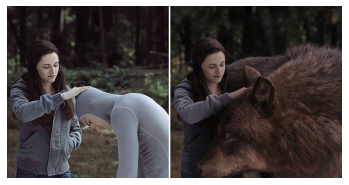

In [39]:
# Display an image (here were are displaying the first image)
plt.imshow(images[0][0])  # Display the first image
plt.axis("off")  # Hide axes
plt.show()


In [40]:
# Find out whether the images are of same or different size

In [41]:
# Shape of the first image (H,W,C)
images[0][0].shape

(333, 650, 3)

In [42]:
# Shape of the second image (H,W,C)
images[1][0].shape

(697, 1280, 4)

In [43]:
# All the images are of different size.

In [44]:
# Metadata data of different images

In [45]:
images[0][1]
# It contains two bounding boxes

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}],
  'imageWidth': 650,
  'imageHeight': 333},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}],
  'imageWidth': 650,
  'imageHeight': 333}]

In [46]:
images[1][1]
# It contains one bounding box

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.7053087757313109, 'y': 0.23260437375745527},
   {'x': 0.7692307692307693, 'y': 0.36182902584493043}],
  'imageWidth': 1280,
  'imageHeight': 697}]

In [47]:
# Split the data into Features(X) & labels(Y). Unify shape of all the images.
X = []
Y = []

for row in images:
    image = row[0]  # Extract image
    annotations = row[1]  # Extract metadata
    
    if annotations:
        image_w = annotations[0]["imageWidth"]  # Get image width
        image_h = annotations[0]["imageHeight"]  # Get image height

        bboxes = []  # Store all face bounding boxes for this image
        for annotation in annotations:
            points = annotation["points"]
            x_min = int(points[0]["x"] * image_w)
            y_min = int(points[0]["y"] * image_h)
            x_max = int(points[1]["x"] * image_w)
            y_max = int(points[1]["y"] * image_h)
            bboxes.append([x_min, y_min, x_max, y_max])

            # Replace all pixels in the masked area with 1
            image[y_min:y_max, x_min:x_max] = 1

        # Store multiple bounding boxes per image
        Y.append(bboxes)

        # Resize the image to a unified shape (e.g., 128x128)
        if len(image.shape) == 2:
            image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
        
        if image.shape[-1] == 4:
            image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
        if image.shape[-1] != 3:
            print("yes")
          
        image_resized = cv2.resize(image, (128, 128))

        X.append(image_resized)


# Convert to NumPy arrays (X remains an array, but Y is a list of varying-sized lists)
#X = np.array(X)

image_no = 1 # select the image whose size you want to display

print("X" + f"{[image_no]}" +" shape:", X[image_no].shape)  # (393, 128, 128, 3)
print("Total images:", len(X))
print("Bounding boxes per image:", [len(y) for y in Y])  # Shows number of boxes per image

X[1] shape: (128, 128, 3)
Total images: 393
Bounding boxes per image: [2, 1, 1, 6, 2, 5, 1, 2, 2, 1, 5, 5, 4, 2, 3, 2, 1, 2, 1, 1, 1, 2, 2, 6, 1, 1, 2, 1, 3, 2, 1, 4, 9, 3, 3, 7, 2, 1, 2, 1, 4, 6, 2, 2, 2, 4, 5, 4, 1, 4, 2, 5, 2, 1, 2, 2, 1, 3, 2, 2, 2, 3, 1, 1, 1, 2, 1, 6, 3, 6, 4, 1, 6, 1, 1, 2, 1, 2, 2, 1, 4, 1, 2, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 3, 2, 1, 3, 2, 1, 3, 3, 1, 1, 5, 2, 1, 1, 1, 8, 4, 1, 5, 1, 1, 2, 1, 1, 6, 2, 2, 4, 1, 1, 4, 1, 2, 1, 4, 1, 4, 2, 2, 5, 4, 4, 1, 1, 1, 6, 1, 3, 1, 1, 2, 2, 3, 5, 3, 8, 1, 3, 5, 1, 2, 3, 2, 4, 1, 11, 9, 1, 2, 2, 1, 6, 5, 2, 2, 3, 6, 1, 3, 2, 1, 2, 9, 3, 4, 6, 7, 3, 2, 4, 3, 4, 4, 3, 6, 4, 4, 4, 4, 2, 1, 1, 4, 4, 1, 1, 4, 4, 2, 4, 5, 5, 2, 2, 2, 4, 1, 2, 2, 1, 2, 2, 2, 1, 6, 5, 4, 5, 3, 7, 2, 2, 4, 3, 2, 1, 1, 1, 2, 1, 5, 2, 1, 1, 4, 2, 6, 2, 2, 2, 6, 1, 1, 1, 4, 2, 3, 1, 1, 6, 2, 1, 2, 3, 2, 4, 6, 7, 1, 4, 1, 1, 1, 1, 1, 3, 3, 3, 2, 1, 2, 2, 5, 2, 5, 3, 4, 2, 3, 1, 2, 2, 3, 1, 1, 4, 3, 3, 4, 1, 3, 1, 5, 6, 3, 2, 1, 3, 3, 1, 5, 4, 5, 1, 1

In [48]:
X = np.array(X)
X.shape

(393, 128, 128, 3)

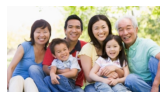

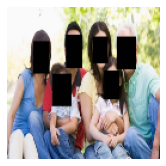

In [49]:
# Comparing the original and masked image
plt.subplot(1,2,1)
plt.imshow(images_original[3][0])  # Display the fourth image with masked region
plt.axis("off")  # Hide axes
plt.show()

plt.subplot(1,2,2)
plt.imshow(X[3])  # Display the fourth image with masked region
plt.axis("off")  # Hide axes
plt.show()


In [50]:
# split the data into train and test 
# As the no. of images are 393 in total so, I am splitting the data (train:test) in the ratio of 384:9

In [51]:
# Assuming X and Y are already defined and shaped as needed
# X is of shape (393, 128, 128, 3), Y is a list of labels

# Split the data into train and test sets (keeping 400 in train and 9 in test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=9, train_size=384, shuffle=True)

# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", len(Y_train))
print("Y_test shape:", len(Y_test))


X_train shape: (384, 128, 128, 3)
X_test shape: (9, 128, 128, 3)
Y_train shape: 384
Y_test shape: 9


In [52]:
# Reshape and normalization
X_train = X_train.astype("float32")
X_train = X_train.reshape(X_train.shape[0],128,128,3)
X_train = X_train/255
X_test = X_test.astype("float32")
X_test = X_test.reshape(X_test.shape[0],128,128,3)
X_test = X_test/255

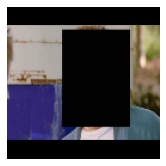

In [53]:
plt.subplot(1,2,2)
plt.imshow(X_train[3])  # Display the fourth image with masked region
plt.axis("off")  # Hide axes
plt.show()

In [54]:
X_train.shape

(384, 128, 128, 3)

In [55]:
X_test.shape

(9, 128, 128, 3)

In [56]:
print(X_train[12])

[[[0.5803922  0.8        0.8666667 ]
  [0.4862745  0.7137255  0.76862746]
  [0.5254902  0.7529412  0.79607844]
  ...
  [0.45490196 0.45490196 0.4745098 ]
  [0.3764706  0.41568628 0.42352942]
  [0.34509805 0.38431373 0.39215687]]

 [[0.5647059  0.8        0.83137256]
  [0.5137255  0.74509805 0.77254903]
  [0.5254902  0.74509805 0.7921569 ]
  ...
  [0.37254903 0.38431373 0.40392157]
  [0.36078432 0.38039216 0.39607844]
  [0.34117648 0.36078432 0.3764706 ]]

 [[0.6627451  0.91764706 0.92941177]
  [0.6156863  0.8509804  0.85490197]
  [0.57254905 0.7764706  0.81960785]
  ...
  [0.37254903 0.39215687 0.41568628]
  [0.3764706  0.3882353  0.40784314]
  [0.34901962 0.36078432 0.38039216]]

 ...

 [[0.10980392 0.1254902  0.17254902]
  [0.10980392 0.1254902  0.17254902]
  [0.10196079 0.11764706 0.16470589]
  ...
  [0.09803922 0.11372549 0.11764706]
  [0.1764706  0.19215687 0.1882353 ]
  [0.18431373 0.2        0.19607843]]

 [[0.10588235 0.12156863 0.16862746]
  [0.10196079 0.11764706 0.16470589]


In [57]:
print(Y_train[12])

[[49, 64, 148, 164]]


In [58]:
# Split training data into train and validation
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [59]:
# We have different no. of bounding boxes in different images. So, we are making a munction to pad bounding boxes. All the images will have same no. of bounding boxes

MAX_BBOXES = 5  # Choose a reasonable max number of boxes per image

# Function to pad bounding boxes
def pad_bboxes(bboxes, max_bboxes=MAX_BBOXES):
    padded = np.zeros((max_bboxes, 4))  # Assuming each box is [x, y, w, h]
    for i, box in enumerate(bboxes[:max_bboxes]):
        padded[i] = box
    return padded

# Convert lists of bounding boxes into a consistent NumPy array
Y_train_padded = np.array([pad_bboxes(y) for y in Y_train])
Y_val_padded = np.array([pad_bboxes(y) for y in Y_val])
Y_test_padded = np.array([pad_bboxes(y) for y in Y_test])

print("Done!!")


Done!!


In [60]:
max(Y_val)

[[1472, 68, 2647, 1771], [2635, 1206, 3579, 2579], [3523, 640, 4512, 2542]]

In [61]:
print(Y_train_padded[12])

[[ 89.  13. 218. 143.]
 [  3. 275.  79. 353.]
 [114. 318. 184. 388.]
 [210. 300. 276. 366.]
 [332. 252. 406. 346.]]


In [62]:
len(Y_train_padded)

307

In [63]:
# Converting bounding boxes to mask

def convert_bboxes_to_mask(bboxes, image_shape):
    """
    Converts bounding boxes to a binary segmentation mask.
    
    Parameters:
        bboxes (list of lists): Bounding boxes in the format [[x_min, y_min, x_max, y_max], ...]
        image_shape (tuple): (height, width) of the image

    Returns:
        mask (numpy array): Binary mask of shape (height, width, 3)
    """
    height, width = image_shape
    mask = np.zeros((height, width,3), dtype=np.uint8)  # Initialize empty mask

    for bbox in bboxes:
        x_min, y_min, x_max, y_max = map(int, bbox)  # Convert to integers

        # Ignore padded bounding boxes (assuming 0,0,0,0 represents padding)
        if x_min == 0 and y_min == 0 and x_max == 0 and y_max == 0:
            continue

        # Draw the bounding box as a filled rectangle (value 1)
        mask[y_min:y_max, x_min:x_max] = 1

    return mask  



In [64]:
Y_test_padded.shape

(9, 5, 4)

In [65]:
Y_val_padded.shape

(77, 5, 4)

In [66]:
# Converting y_... into shape (batchsize,height,width,channels)
batch_size = len(Y_train_padded)  # Assuming Y_train_padded is a list of bounding box lists
height, width = 128, 128  # Replace with actual image size

# Initialize batch mask
y_true = np.zeros((batch_size, height, width, 3), dtype=np.uint8)


for i, bboxes in enumerate(Y_train_padded):
    y_true[i] = convert_bboxes_to_mask(bboxes, (height, width))
    
batch_size = len(Y_test_padded)
y_test_true = np.zeros((batch_size, height, width, 3), dtype=np.uint8)
for i, bboxes in enumerate(Y_test_padded):
    y_test_true[i] = convert_bboxes_to_mask(bboxes, (height, width))

batch_size = len(Y_val_padded)
y_val_true = np.zeros((batch_size, height, width, 3), dtype=np.uint8)

for i, bboxes in enumerate(Y_val_padded):
    y_val_true[i] = convert_bboxes_to_mask(bboxes, (height, width))


print(y_true.shape)  # Expected: (batch_size, height, width, 3)
print(y_test_true.shape)
print(y_val_true.shape)

(307, 128, 128, 3)
(9, 128, 128, 3)
(77, 128, 128, 3)


In [67]:
# Define loss function, create model
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
import tensorflow.keras.backend as K

# ----------------------------- Dice Coefficient & Loss -----------------------------
@tf.function 
def dice_coefficient(y_true, y_pred, smooth=1):
    """
    Computes the Dice Coefficient for segmentation accuracy.
    - y_true: Ground truth mask (batch_size, height, width, channels)
    - y_pred: Predicted mask (batch_size, height, width, channels)
    - smooth: Small constant to prevent division by zero
    """
    y_true_f = K.flatten(y_true)  # Flatten tensors to 1D
    y_pred_f = K.flatten(y_pred)

    intersection = K.sum(y_true_f * y_pred_f)  # Overlapping pixels
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

@tf.function 
def dice_loss(y_true, y_pred):
    """
    Computes the Dice Loss.
    - Uses dice_coefficient to measure overlap.
    - Loss = 1 - Dice Coefficient (since we want to minimize it).
    """
    return 1 - dice_coefficient(y_true, y_pred)

# ----------------------------- MobileNet + U-Net Model -----------------------------

def build_mobilenet_unet(input_shape=(128, 128, 3)):
    """
    Builds a segmentation model using MobileNetV2 as an encoder and U-Net upsampling as a decoder.

    Returns:
        - A Keras Model that takes (128,128,3) images and outputs segmentation masks (128,128,3)
    """

    # Encoder: Pretrained MobileNetV2 (Feature Extractor)
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False  # Freeze pretrained layers

    # Extract specific layers for skip connections
    encoder_layers = [
        base_model.get_layer("block_1_expand_relu").output,  # 64x64
        base_model.get_layer("block_3_expand_relu").output,  # 32x32
        base_model.get_layer("block_6_expand_relu").output,  # 16x16
        base_model.get_layer("block_13_expand_relu").output, # 8x8
        base_model.output  # 4x4
    ]

    # Decoder: Upsampling layers (U-Net style)
    x = encoder_layers[-1]  # Start from the deepest feature map (4x4)

    x = UpSampling2D((2, 2))(x)  # Upsample to 8x8
    x = Concatenate()([x, encoder_layers[-2]])  

    x = UpSampling2D((2, 2))(x)  # Upsample to 16x16
    x = Concatenate()([x, encoder_layers[-3]])

    x = UpSampling2D((2, 2))(x)  # Upsample to 32x32
    x = Concatenate()([x, encoder_layers[-4]])

    x = UpSampling2D((2, 2))(x)  # Upsample to 64x64
    x = Concatenate()([x, encoder_layers[-5]])

    x = UpSampling2D((2, 2))(x)  # Upsample to 128x128

    # Final output layer to produce segmentation masks
    y_pred = Conv2D(3, (1, 1), activation='sigmoid', name="output_mask")(x)  # Output: (128,128,3)

    # Define model
    model = Model(inputs=base_model.input, outputs=y_pred)
    return model

# ----------------------------- Training the Model -----------------------------

# Create model
model = build_mobilenet_unet()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=dice_loss,
              metrics=[dice_coefficient])

# Print model summary
model.summary()




Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']         

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 16, 16, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 16, 16, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 16, 16, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 16, 16, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 8, 8, 384)    0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 8, 8, 384)   3456        ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 8, 8, 384)   1536        ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 8, 8, 96)    384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 8, 8, 576)    55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 8, 8, 576)   2304        ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 8, 8, 576)    0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 4, 4, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 4, 4, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 4, 4, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 4, 4, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

 up_sampling2d_4 (UpSampling2D)  (None, 128, 128, 22  0          ['concatenate_3[0][0]']          
                                88)                                                               
                                                                                                  
 output_mask (Conv2D)           (None, 128, 128, 3)  6867        ['up_sampling2d_4[0][0]']        
                                                                                                  
Total params: 2,264,851
Trainable params: 6,867
Non-trainable params: 2,257,984
__________________________________________________________________________________________________


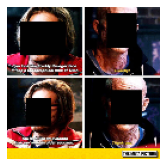

In [68]:
plt.subplot(1,2,2)
plt.imshow(X_train[3])  # Display the fourth image with masked region
plt.axis("off")  # Hide axes
plt.show()

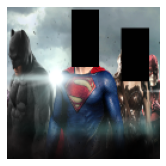

In [69]:
plt.subplot(1,2,2)
plt.imshow(X_val[3])  # Display the fourth image with masked region
plt.axis("off")  # Hide axes
plt.show()

In [70]:
# Convert Masks (Y_train) to float32 and Normalize
y_true = np.array(y_true, dtype=np.float32) / 255.0
y_val_true = np.array(y_val_true, dtype=np.float32) / 255.0

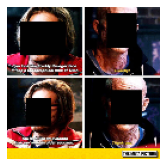

In [71]:
plt.subplot(1,2,2)
plt.imshow(X_train[3])  # Display the fourth image with masked region
plt.axis("off")  # Hide axes
plt.show()

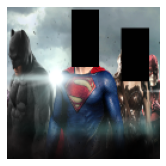

In [72]:
plt.subplot(1,2,2)
plt.imshow(X_val[3])  # Display the fourth image with masked region
plt.axis("off")  # Hide axes
plt.show()

In [73]:
# Assuming X_train and Y_train are already preprocessed and available (we have considered only two epochs just to understand the concept)
# No. of epochs can be incresed to improve the training of the model
model.fit(X_train, y_true, batch_size=16, epochs=2, validation_data=(X_val, y_val_true))

Epoch 1/2
20/20 [==============================] - 50s 2s/step - loss: 0.9995 - dice_coefficient: 5.4009e-04 - val_loss: 0.9995 - val_dice_coefficient: 5.5148e-04
Epoch 2/2
20/20 [==============================] - 38s 2s/step - loss: 0.9987 - dice_coefficient: 0.0015 - val_loss: 0.9988 - val_dice_coefficient: 0.0012


In [74]:
X_train[3]

array([[[0.03529412, 0.15686275, 0.22745098],
        [0.03529412, 0.15686275, 0.22745098],
        [0.02745098, 0.15294118, 0.20392157],
        ...,
        [0.2       , 0.21176471, 0.23921569],
        [0.19607843, 0.20392157, 0.2509804 ],
        [0.2       , 0.20784314, 0.2509804 ]],

       [[0.05098039, 0.15686275, 0.21176471],
        [0.05490196, 0.16470589, 0.21960784],
        [0.03529412, 0.14117648, 0.19607843],
        ...,
        [0.20784314, 0.21568628, 0.24313726],
        [0.20784314, 0.21568628, 0.2627451 ],
        [0.21176471, 0.21960784, 0.26666668]],

       [[0.07058824, 0.19215687, 0.26666668],
        [0.08235294, 0.20392157, 0.28235295],
        [0.04313726, 0.17254902, 0.23921569],
        ...,
        [0.1254902 , 0.1254902 , 0.16862746],
        [0.13725491, 0.14117648, 0.18039216],
        [0.12941177, 0.12941177, 0.16862746]],

       ...,

       [[0.9882353 , 0.83137256, 0.00392157],
        [1.        , 0.84313726, 0.01176471],
        [0.9882353 , 0

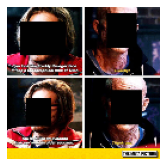

In [75]:
plt.subplot(1,2,2)
plt.imshow(X_train[3])  # Display the fourth image with masked region
plt.axis("off")  # Hide axes
plt.show()

In [76]:
X_val[3]

array([[[0.48235294, 0.54509807, 0.5764706 ],
        [0.48235294, 0.54509807, 0.5803922 ],
        [0.48235294, 0.5529412 , 0.5882353 ],
        ...,
        [0.5372549 , 0.60784316, 0.6156863 ],
        [0.5294118 , 0.60784316, 0.6039216 ],
        [0.5294118 , 0.6039216 , 0.6117647 ]],

       [[0.48235294, 0.54509807, 0.5764706 ],
        [0.49019608, 0.5568628 , 0.58431375],
        [0.49019608, 0.56078434, 0.5921569 ],
        ...,
        [0.53333336, 0.6039216 , 0.6156863 ],
        [0.53333336, 0.6117647 , 0.60784316],
        [0.53333336, 0.6039216 , 0.6117647 ]],

       [[0.49411765, 0.5647059 , 0.5921569 ],
        [0.49803922, 0.5686275 , 0.59607846],
        [0.5019608 , 0.57254905, 0.60784316],
        ...,
        [0.5372549 , 0.6117647 , 0.62352943],
        [0.5372549 , 0.6117647 , 0.6156863 ],
        [0.5372549 , 0.60784316, 0.61960787]],

       ...,

       [[0.05882353, 0.05490196, 0.05490196],
        [0.0627451 , 0.05490196, 0.05490196],
        [0.0627451 , 0

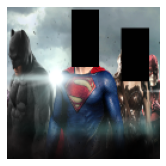

In [77]:
plt.subplot(1,2,2)
plt.imshow(X_val[3])  # Display the fourth image with masked region
plt.axis("off")  # Hide axes
plt.show()

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Select the test image (index 3)
test_image = X_val[3]  # Shape: (128, 128, 3)
test_mask = y_val_true[3]   # Corresponding ground truth mask


In [79]:
# Expand dimensions to match model input (batch size of 1)
test_image_input = np.expand_dims(test_image, axis=0)  # Shape: (1, 128, 128, 3)

# Get predicted mask
predicted_mask = model.predict(test_image_input)[0]  # Remove batch dimension


1/1 [==============================] - 1s 807ms/step


In [80]:
# Convert to binary mask (thresholding at 0.5)
predicted_mask_binary = (predicted_mask > 0.5).astype(np.uint8)


In [81]:
# Define mask overlay color (e.g., red for mask regions)
overlay_color = np.array([255, 0, 0], dtype=np.uint8)  # Red color

# Create an overlay where the mask is present
overlay = (predicted_mask_binary * overlay_color).astype(np.uint8)

# Blend the overlay with the original image
blended_image = (0.6 * test_image * 255 + 0.4 * overlay).astype(np.uint8)


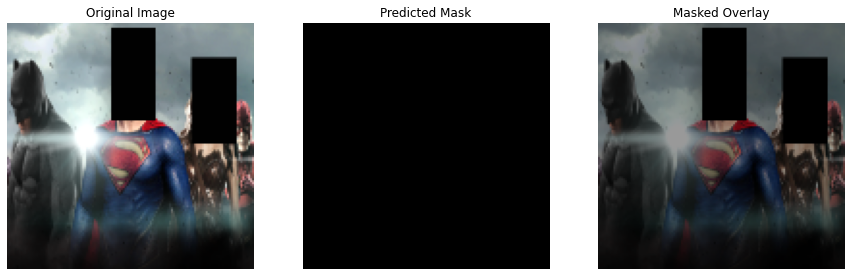

In [82]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Original Image
ax[0].imshow(test_image)
ax[0].set_title("Original Image")
ax[0].axis("off")

# Predicted Mask
ax[1].imshow(predicted_mask_binary, cmap="gray")
ax[1].set_title("Predicted Mask")
ax[1].axis("off")

# Overlay Image
ax[2].imshow(blended_image)
ax[2].set_title("Masked Overlay")
ax[2].axis("off")

plt.show()


In [83]:
print("Test Image Min:", test_image.min(), "Max:", test_image.max())


Test Image Min: 0.003921569 Max: 1.0


In [84]:
print("Predicted Mask Min:", predicted_mask.min(), "Max:", predicted_mask.max())


Predicted Mask Min: 9.510973e-13 Max: 0.02793207


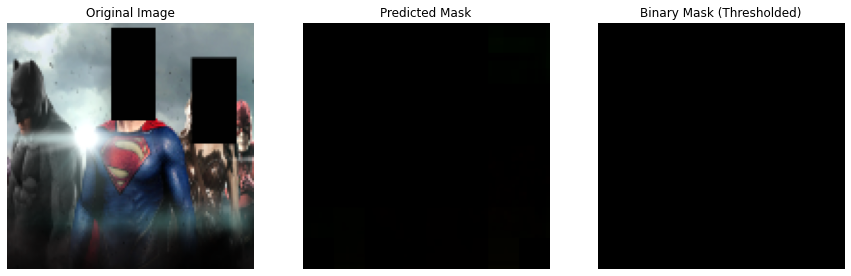

In [85]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(test_image, cmap="gray")  # Use grayscale for clarity
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(predicted_mask, cmap="gray")  # Use grayscale for predicted mask
ax[1].set_title("Predicted Mask")
ax[1].axis("off")

ax[2].imshow(predicted_mask_binary, cmap="gray")  # Display binary mask
ax[2].set_title("Binary Mask (Thresholded)")
ax[2].axis("off")

plt.show()


# Insights and performance of the model
- The model is not trained properly as the no. of epochs considered are two. This is just to understand the implementation of the model and to understand the process flow.
- The performance can be improved by increasing the no. of epochs.